<a href="https://colab.research.google.com/github/Darraysen/DS-Unit-1-Sprint-1-Data-Wrangling-and-Storytelling/blob/master/LS_DS_114_Make_Explanatory_Visualizations_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lambda School Data Science

*Unit 1, Sprint 1, Module 4*

---

# ASSIGNMENT

### 1) Replicate the lesson code. I recommend that you [do not copy-paste](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit).

Get caught up to where we got our example in class and then try and take things further. How close to "pixel perfect" can you make the lecture graph?

Once you have something that you're proud of, share your graph in the cohort channel and move on to the second exercise.

### 2) Reproduce another example from [FiveThityEight's shared data repository](https://data.fivethirtyeight.com/).

**WARNING**: There are a lot of very custom graphs and tables at the above link. I **highly** recommend not trying to reproduce any that look like a table of values or something really different from the graph types that we are already familiar with. Search through the posts until you find a graph type that you are more or less familiar with: histogram, bar chart, stacked bar chart, line chart, [seaborn relplot](https://seaborn.pydata.org/generated/seaborn.relplot.html), etc. Recreating some of the graphics that 538 uses would be a lot easier in Adobe photoshop/illustrator than with matplotlib. 

- If you put in some time to find a graph that looks "easy" to replicate you'll probably find that it's not as easy as you thought. 

- If you start with a graph that looks hard to replicate you'll probably run up against a brick wall and be disappointed with your afternoon.












In [0]:
# Lesson Code:

In [0]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# use the 'magic symbol (%) to specify some non-python code (affects the underlying jupyter kernel)
%matplotlib inline
'''
That line is only for jupyter notebooks, and allows plt figures to show up in your notebook.
if you are using another editor, you'll use:
    plt.show()
at the end of all your plotting commands to have the figure pop up in another window.
'''

"\nThat line is only for jupyter notebooks, and allows plt figures to show up in your notebook.\nif you are using another editor, you'll use:\n    plt.show()\nat the end of all your plotting commands to have the figure pop up in another window.\n"

In [0]:
# Specify the 'plot style' we want to use with pandas and matplotlib
plt.style.use('fast')
# "fast is actually the default style, so you don't necessarily have to set it."

In [5]:
# List of other available plot styles you can use instead of "fast".
plt.style.available

['tableau-colorblind10',
 'seaborn-muted',
 'seaborn',
 'dark_background',
 'grayscale',
 'seaborn-paper',
 'seaborn-ticks',
 'classic',
 'seaborn-white',
 'seaborn-bright',
 '_classic_test',
 'seaborn-pastel',
 'seaborn-poster',
 'bmh',
 'seaborn-darkgrid',
 'seaborn-notebook',
 'seaborn-dark',
 'seaborn-dark-palette',
 'fivethirtyeight',
 'seaborn-deep',
 'Solarize_Light2',
 'fast',
 'seaborn-colorblind',
 'seaborn-talk',
 'ggplot',
 'seaborn-whitegrid']

**Continuous vs. categorical variables**

In [6]:
# Read in the titanic dataset
url = 'https://raw.githubusercontent.com/austinlasseter/pandas_visualization/master/data/titanic.csv'
df = pd.read_csv(url)
df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked
0,0,3,male,22.0,7.2500,Southampton
1,1,1,female,38.0,71.2833,Cherbourg
2,1,3,female,26.0,7.9250,Southampton
3,1,1,female,35.0,53.1000,Southampton
4,0,3,male,35.0,8.0500,Southampton


In [7]:
# cabin class is a categorical variable
# it can be displayed using either number or string values.
df['cabin_class'] = df['Pclass'].map({1:'first', 2:'second', 3:'third'})
df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,cabin_class
0,0,3,male,22.0,7.2500,Southampton,third
1,1,1,female,38.0,71.2833,Cherbourg,first
2,1,3,female,26.0,7.9250,Southampton,third
3,1,1,female,35.0,53.1000,Southampton,first
4,0,3,male,35.0,8.0500,Southampton,third


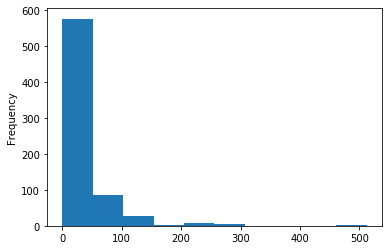

In [8]:
# Fare is a continuous variable, so we can display it with a histogram
df['Fare'].plot(kind='hist');

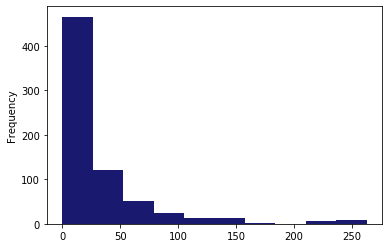

In [9]:
# Remove two extreme outliers
df = df[df['Fare'] < 500]
df['Fare'].plot(kind='hist', color='midnightblue');

In [10]:
# continuous variable can be converted to a categorical var using binning.
farebins=[0, 8, 15, 33, 512]
farelabels=['low', 'medium', 'high', 'vhigh']
df['fare_groups'] = pd.cut(df['Fare'], bins=farebins, labels=farelabels)
df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,cabin_class,fare_groups
0,0,3,male,22.0,7.2500,Southampton,third,low
1,1,1,female,38.0,71.2833,Cherbourg,first,vhigh
2,1,3,female,26.0,7.9250,Southampton,third,low
3,1,1,female,35.0,53.1000,Southampton,first,vhigh
4,0,3,male,35.0,8.0500,Southampton,third,medium


In [0]:
myresults = df['fare_groups'].value_counts().sort_index()

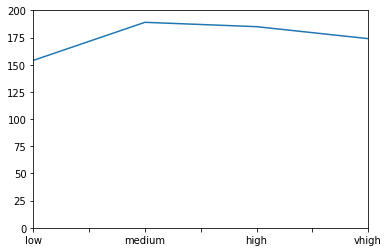

In [12]:
# sometimes it's important to specify the range of your y-axis to get more accurate results
# 'lim' = 'limits'
myresults.plot(ylim=(0,200));

**Display a single continuous variable**

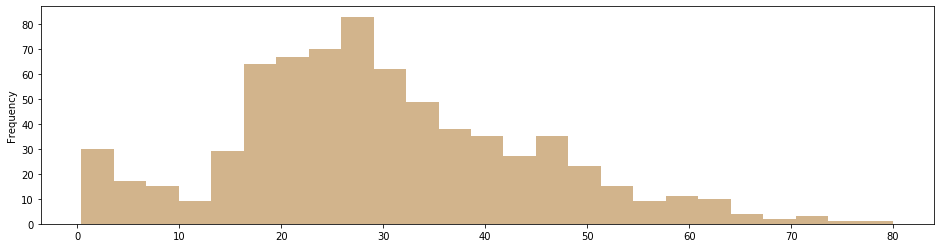

In [13]:
# Histogram
df['Age'].plot(kind='hist', bins=25, figsize=(16, 4), color='tan');

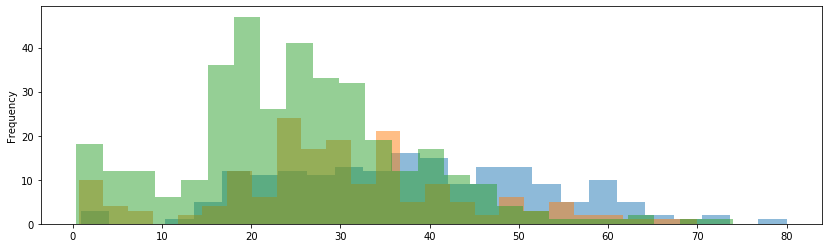

In [14]:
# Stacked Histogram of continuous varable, broken out by categorical variable
df[df['Pclass']==1]['Age'].plot(kind='hist', bins=25, figsize=(14, 4), alpha=0.5);
df[df['Pclass']==2]['Age'].plot(kind='hist', bins=25, figsize=(14, 4), alpha=0.5);
df[df['Pclass']==3]['Age'].plot(kind='hist', bins=25, figsize=(14, 4), alpha=0.5);

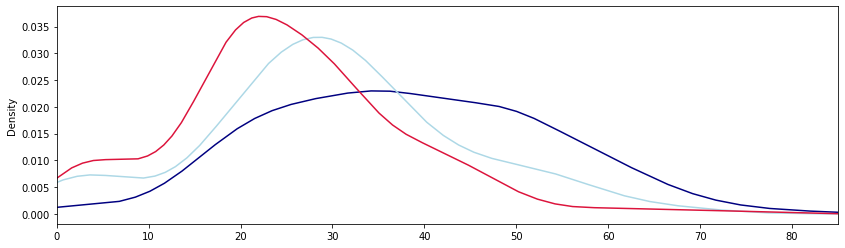

In [15]:
# But this is actually easier to read using a Kernel Density Estimate (KDE).
# Note the use of 'xlim'
df[df['Pclass']==1]['Age'].plot(kind='density', xlim=(0,85), figsize=(14,4), color='navy');
df[df['Pclass']==2]['Age'].plot(kind='density', xlim=(0,85), figsize=(14,4), color='lightblue');
df[df['Pclass']==3]['Age'].plot(kind='density', xlim=(0,85), figsize=(14,4), color='crimson');

**Display a single categorical variable**

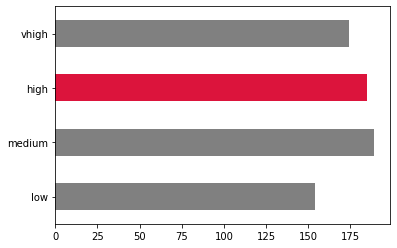

In [16]:
# Bar chart. Use colors to make a particular value 'pop'!
df['fare_groups'].value_counts().sort_index().plot(kind='barh', color=['gray', 'gray', 'crimson', 'gray']);

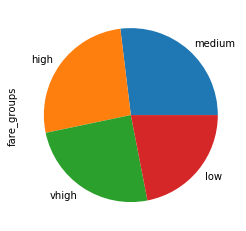

In [17]:
# Pie chart
df['fare_groups'].value_counts().plot(kind='pie', figsize=(4, 4));

**Compare two categorical variables**

In [0]:
# Compare two categorical variables using crosstab
cab_survive = pd.crosstab(df['cabin_class'], df['Survived'])

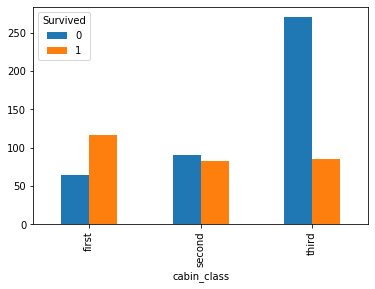

In [19]:
# Make the crosstab into a bar chart.
cab_survive.plot(kind='bar');

In [0]:
# Crosstab with column percents.
cab_survive1 = pd.crosstab(df['cabin_class'], df['Survived'], normalize='columns')

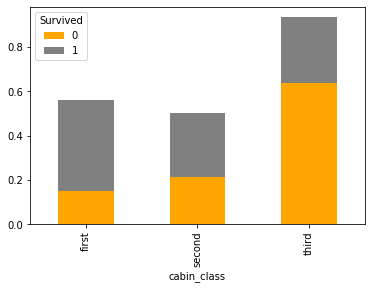

In [21]:
# make a stacked bar chart, for easy comparison of two categoriecal variables.
cab_survive1.plot(kind='bar', stacked=True, color=['orange', 'gray']);

In [0]:
# Another Crosstab with column percents.
cab_survive2 = pd.crosstab(df['cabin_class'], df['Survived'], normalize='index')

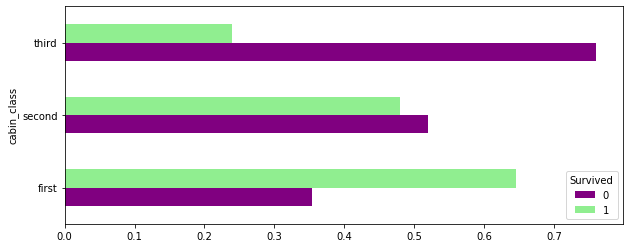

In [23]:
# A paired barchart for comparison of two categorical variables. Not the use of 'barh'.
cab_survive2.plot(kind='barh', color=['purple', 'lightgreen'], figsize=(10, 4));

**Categorical and continuous variable**

In [24]:
# Let's look at a single continuous variable
df['Age'].mean()

29.618011283497882

In [0]:
# Now explore that continuous variable broken out by a separate, categorical one.
cab_age = df.groupby('cabin_class')['Age'].mean()

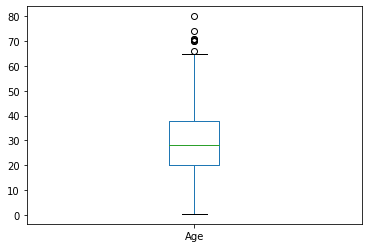

In [26]:
# To visualize a single continuous variable you can just use `.plot` with `kind=box`
df['Age'].plot(kind='box');

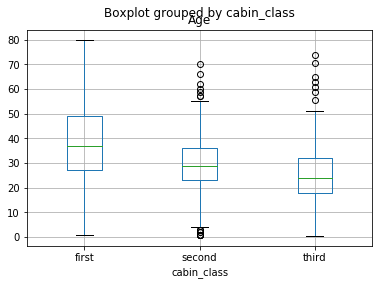

In [27]:
# But to break out a continuous variable by a categorical variable, use `.boxplot`
df.boxplot(column='Age', by='cabin_class');

**Compare two or three continuous variables**

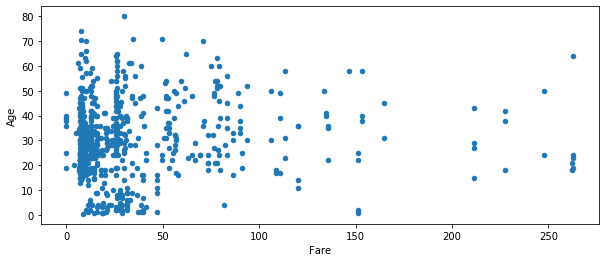

In [28]:
#Two continuous variables: age by far
df.plot(kind='scatter', x='Fare', y='Age', figsize=(10,4));

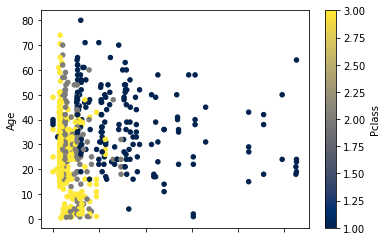

In [29]:
# Three variables: age, fare, and cabin class (color can be either continuous or categorical here).
df.plot(kind='scatter', x='Fare', y='Age', c='Pclass', colormap='cividis');

**Use a line plot to examine two continuous variables (often time)**

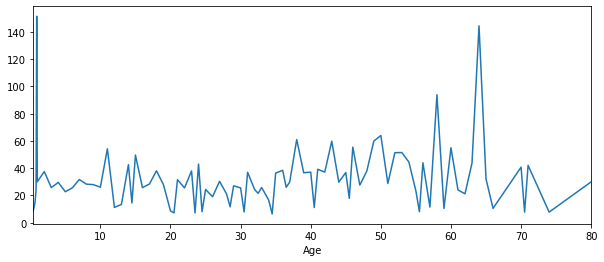

In [30]:
# line chart: age by fare
df.groupby('Age')['Fare'].mean().plot(kind='line', figsize=(10, 4));

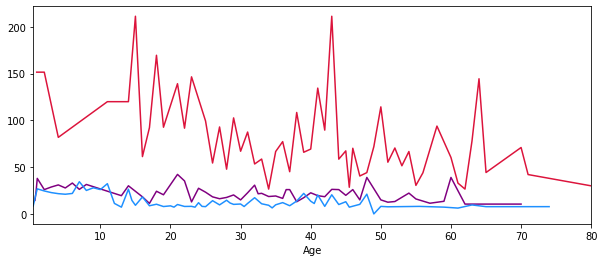

In [31]:
# Line chart: age by fare and cabin class
mycolors=['crimson', 'purple', 'dodgerblue']
# Rather than specifying 3 plots (as we did above, with the histogram)
# you can just loop through the values.
for x in [1,2,3]:
    df[df['Pclass']==x].groupby('Age')['Fare'].mean().plot(figsize=(10, 4), color=mycolors[x-1])

**Compare multiple continuous variables**

In [32]:
# Correlation Matrix
corr_matrix=df.corr()
corr_matrix

,Survived,Pclass,Age,Fare
Survived,1.000000,-0.351579,-0.084756,0.272376
Pclass,-0.351579,1.000000,-0.365259,-0.616062
Age,-0.084756,-0.365259,1.000000,0.096573
Fare,0.272376,-0.616062,0.096573,1.000000


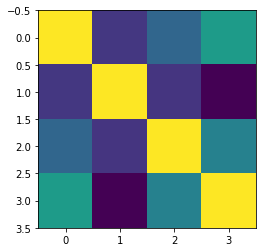

In [33]:
# Display the correlation matrix as a heatmap
plt.imshow(corr_matrix);

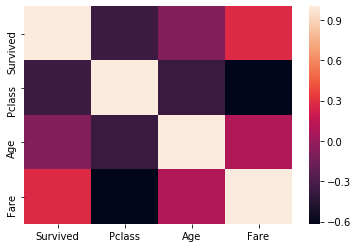

In [34]:
# Seaborn.
import seaborn as sns
sns.heatmap(corr_matrix);

**Matplotlib**

In [0]:
# The data we want to plot
import numpy as np
x = np.linspace(0, 5, 11)
y = x **2

In [36]:
x

array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ])

In [37]:
y

array([ 0.  ,  0.25,  1.  ,  2.25,  4.  ,  6.25,  9.  , 12.25, 16.  ,
       20.25, 25.  ])

**Basic Matplotlib Commands**

(Shift+Tab will open docstrings for functions)

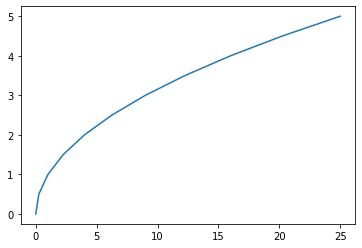

In [38]:
# very simple plot, to get started. Notice that NO PANDAS is required!
plt.plot(y, x);

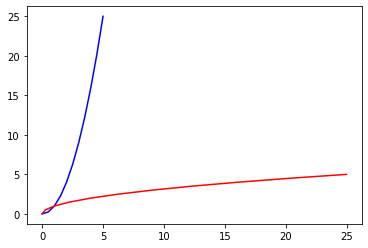

In [39]:
# You can have two 'plt' plots together (and let's add some color).
plt.plot(x, y, 'b')
plt.plot(y, x, 'r');

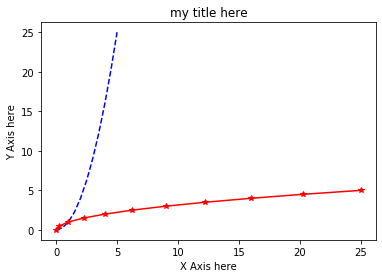

In [40]:
# Now add some labels, plus a little texture.
plt.plot(x, y, 'b--') # for dashed blue line
plt.plot(y, x, 'r*-') # for a starred red line
plt.xlabel('X Axis here')
plt.ylabel('Y Axis here')
plt.title('my title here');

**Creating Multiplots on Same Canvas**

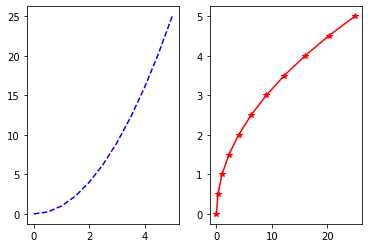

In [41]:
# The basic syntax goes like this: plt.subplot(nrows, cols, plot_number)
plt.subplot(1, 2, 1)
plt.plot(x, y, 'b--')

plt.subplot(1,2,2)
plt.plot(y, x, 'r*-');

**Matplotlib Object Oriented Method**

`plt.Figure` holds all the axes, graphics, text, and labels of the plot. Usually called `fig`

`plt.Axes` is a bounding box with ticks and labels, usually called `ax`. (you can have more than one Axes in a given figure).

`ax.plot()` is a method that plots data within a given `ax`.

https://jakevdp.github.io/PythonDataScienceHandbook/04.01-simple-line-plots.html

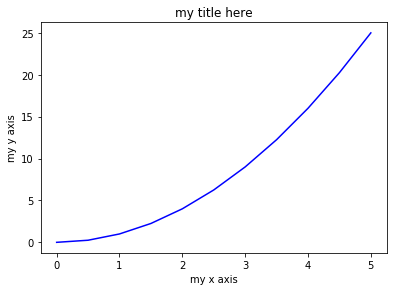

In [42]:
# Create a Figure (empty canvas)
fig = plt.figure()
# Add set of axes to figure
# left, bottom, width, height (method allows a range of 0 to 1)
axes = fig.add_axes([0.1, 0.1, 0.8, 0.8])
# Plot on that set of axes
axes.plot(x, y, 'b')
axes.set_xlabel('my x axis')
axes.set_ylabel('my y axis')
axes.set_title('my title here');
# Notice the use of set_ to begin methods


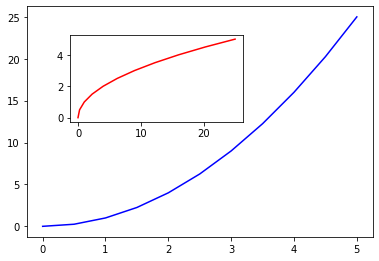

In [43]:
# More complicated code, but allows for finer control.

# Creates a blank canvas
fig = plt.figure()
axes1 = fig.add_axes([0.1, 0.1, 0.8, 0.8])
axes2 = fig.add_axes([0.2, 0.5, 0.4, 0.3]);
# Larger Figure Axes 1
axes1.plot(x, y, 'b')
# Insert Figure Axes 2
axes2.plot(y, x, 'r');

**The `subplots()` method**

The `plt.subplots()` object is a more automatic axis manager; somewhat more common than `.figure()`

`plt.subplots()` is a function that **returns a tuple** containing a figure and axes object(s). Thus when using `fig, ax = plt.subplots()` you unpack this tuple into the variables `fig` and `ax`. Having `fig` is useful if you want to change figure-level attributes or save the figure as an image file later (e.g. with `fig.savefig('yourfilename.png')`). You certainly don't have to use the returned figure object but many people do use it later so it's common to see. Also, all axes objects (the objects that have plotting methods), have a parent figure object anyway, thus:

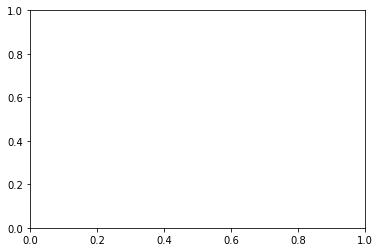

In [44]:
fig, ax, = plt.subplots()

is more concise than:

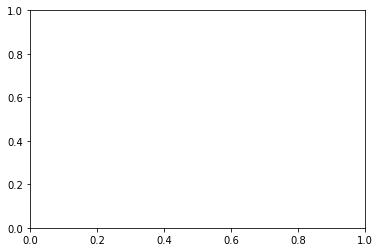

In [45]:
fig = plt.figure()
ax = fig.add_subplot(111)

https://stackoverflow.com/questions/34162443/why-do-many-examples-use-fig-ax-plt-subplots-in-matplotlib-pyplot-python

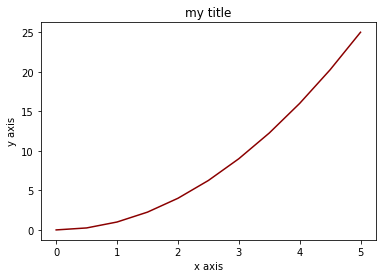

In [46]:
# Use similar to plt.figure() except use tuple upacking to grab fig and axes
fig, axes = plt.subplots(nrows=1, ncols=1)


# The default is `(1, 1)` so you don't actually have to specify this.

# Now use the axes object to add stuff to plot
axes.plot(x, y, 'darkred')
axes.set_xlabel('x axis')
axes.set_ylabel('y axis')
axes.set_title('my title');

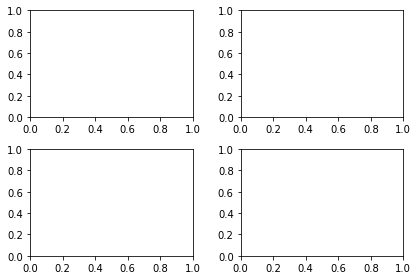

In [47]:
# Empty canvas of 1 by 2 subplots
fig, axes = plt.subplots(nrows=2, ncols=2)


# the parameter labels 'nrows' and 'ncols' are optional.
plt.tight_layout()
# more about '.tight_layout()' below.

In [48]:
# Axes is an array of axes to plot on
axes

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f33be9de908>,
      dtype=object)

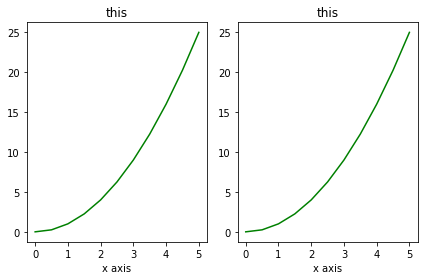

In [49]:
# We can iterate through this array:
fig, axes = plt.subplots(nrows=1, ncols=2)


# Display the figure object
for ax in axes:
    ax.plot(x, y, 'g')
    ax.set_xlabel('x axis')
    ax.set_title('this');
plt.tight_layout()


In [0]:
# Replicate FiveThirtyEight graph 'Do Americans support impeaching Trump?'
# https://projects.fivethirtyeight.com/impeachment-polls/
url = 'https://projects.fivethirtyeight.com/impeachment-polls/impeachment_topline.csv'

# Figure size, aspect ratio and DPI

Matplotlib allows the aspect ratio, DPI and figure size to be specified when the Figure object is created. You can use the `figsize` and `dpi` keyword argument.


*   `figsize` is a tuple of the width and height of the figure in inches
*   `dpi` is the dots/pixels-per-inch.



In [51]:
fig = plt.figure(figsize=(8,4), dpi=100)

<Figure size 800x400 with 0 Axes>

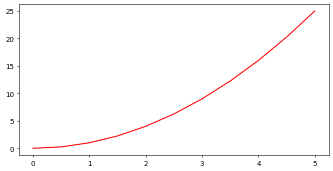

In [52]:
# The same args can be passed to layout managers like 'subplots()'
fig, axes = plt.subplots(figsize=(8, 4), dpi=50)
axes.plot(x, y, 'r');

# Saving Figures

Matplotlib can generate high-quality output in a number of formats, including PNG, JPG, EPS, SVG, PGF, and PDF.

To save a figure to a file, we can use the `savefig` method in the `Figure` class:

In [0]:
fig.savefig('filename.png')

Optionally, we can specify the DPI and choose between different output formats:

In [0]:
fig.savefig('filename.png', dpi=200)

# Legends, labels and titles

Now that we have covered the basics of how to create a figure canvas and add axes instances to the canvas, let's look at how to decorate a figure with titles, axis labels, and legends.

**Figure Titles**

A title can be added to each axis instance in a figure. To set the title, use the `set_title` method in the axes instance:

In [55]:
ax.set_title('my title')

Text(0.5, 1, 'my title')

**Axis Labels**

Similarly, with the methods `set_xlabel` and `set_ylabel`, we can set the labels of the X ad Y axes:

In [56]:
ax.set_xlabel('my x label')
ax.set_ylabel('my y label')

Text(213.8, 0.5, 'my y label')

# Legends


You can use the `label="label text"` keyword argument when plots or other objects are added to the figure, and then using the `legend()` method without argumets to add the legend to the figure:

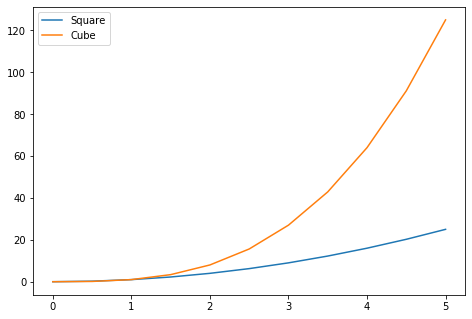

In [57]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax
ax.plot(x, x**2, label='Square')
ax.plot(x, x**3, label='Cube')
ax.legend();

The `legend()` method takes an optional keyword argument `loc` that can be used to specify where in the legend is to be drawn. The allowed values of `loc` are numerical codes for the various places the legend can be drawn. See the [documentation page](http://matplotlib.org/users/legend_guide.html#legend-location) for details. Some of the most common `loc` values are:

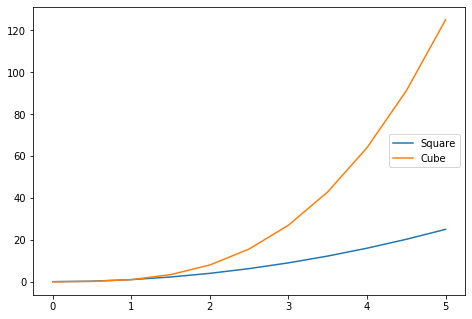

In [58]:
# Lots of options........
ax.legend(loc=1)
ax.legend(loc=5)
#ax.legend(loc=9)
fig
# Try replacing the 'loc' value with integers 1 through 10.
# let matplotlib decide the optimal location

# Setting colors, linewidths, linetypes

Matplotlib gives you a *lot* of options for customizing colors, linewidths, and linetypes.

There is the basic MATLAB-like syntax (which I would suggest you avoid using for the sake of clarity):

# Colors with MatLab like syntax


With matplotlib, we can define the colors of lines and other graphical elements in a number of ways. First of all, we can use the MATLAB-like syntax where `'b'` means blue, `'g'` means green, etc. The MATLAB API for selecting line styles are also supported: where, for example, `'b.-'` means a blue line with dots:

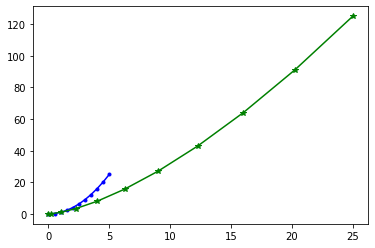

In [59]:
# MATLAB style line color and style
fig, ax = plt.subplots()

# blue line with dots
ax.plot(x, x**2, 'b.-')

# green dashed line
ax.plot(y, x**3, 'g-*')

# Colors with the `color=` parameter:


We can also define colors by their names or RGB hex codes and optionally provide an alpha value using the `color` and `alpha` keyword arguments. Alpha indicates opacity.

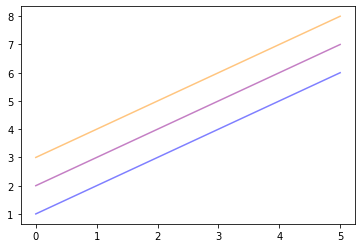

In [60]:
fig, ax = plt.subplots()

# half-transparent
ax.plot(x, x+1, color='blue', alpha=0.5)

# RGB hex code
ax.plot(x, x+2, color='#8B008B', alpha=0.5)

# RGB hex code
ax.plot(x, x+3, color='#FF8C00', alpha=0.5);

# Line and marker styles


To change the line width, we can use the `linewidth` or `lw` keyword argument, The line style can be slected using the `linestyle` or `ls` keyword arguments:

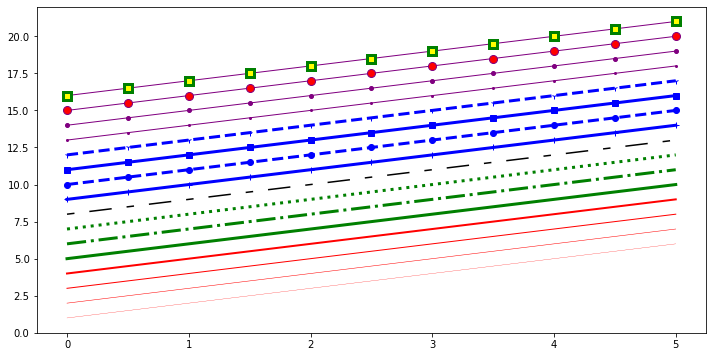

In [61]:
fig, ax = plt.subplots(figsize=(12,6))

ax.plot(x, x+1, color="red", linewidth=0.25)
ax.plot(x, x+2, color="red", linewidth=0.50)
ax.plot(x, x+3, color="red", linewidth=1.00)
ax.plot(x, x+4, color="red", linewidth=2.00)

# possible linestype options ‘-‘, ‘–’, ‘-.’, ‘:’, ‘steps’
ax.plot(x, x+5, color="green", lw=3, linestyle='-')
ax.plot(x, x+6, color="green", lw=3, ls='-.')
ax.plot(x, x+7, color="green", lw=3, ls=':')

# custom dash
line, = ax.plot(x, x+8, color="black", lw=1.50)
line.set_dashes([5, 10, 15, 10]) # format: line length, space length, ...

# possible marker symbols: marker = '+', 'o', '*', 's', ',', '.', '1', '2', '3', '4', ...
ax.plot(x, x+ 9, color="blue", lw=3, ls='-', marker='+')
ax.plot(x, x+10, color="blue", lw=3, ls='--', marker='o')
ax.plot(x, x+11, color="blue", lw=3, ls='-', marker='s')
ax.plot(x, x+12, color="blue", lw=3, ls='--', marker='1')

# marker size and color
ax.plot(x, x+13, color="purple", lw=1, ls='-', marker='o', markersize=2)
ax.plot(x, x+14, color="purple", lw=1, ls='-', marker='o', markersize=4)
ax.plot(x, x+15, color="purple", lw=1, ls='-', marker='o', markersize=8, markerfacecolor="red")
ax.plot(x, x+16, color="purple", lw=1, ls='-', marker='s', markersize=8, 
        markerfacecolor="yellow", markeredgewidth=3, markeredgecolor="green");

# Control over axis appearance


In this section we will look at controlling axis sizing properties in a matplotlib figure.

# Plot range

We can configure the ranges of the axes using the `set_ylim` and `set_xlim` methods in the axis object, or `axis('tight')` for automatically getting "tightly fitted" axes ranges:

Text(0.5, 1.0, 'custom axes range')

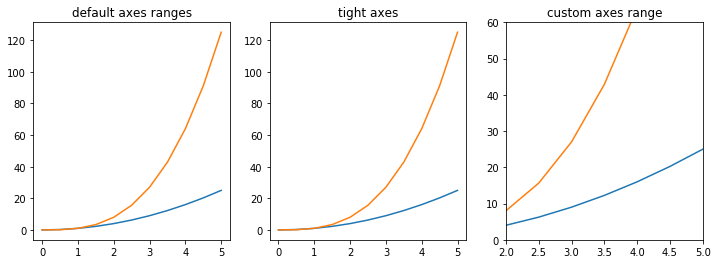

In [62]:
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

axes[0].plot(x, x**2, x, x**3)
axes[0].set_title("default axes ranges")

axes[1].plot(x, x**2, x, x**3)
axes[1].axis('tight')
axes[1].set_title("tight axes")

axes[2].plot(x, x**2, x, x**3)
axes[2].set_ylim([0, 60])
axes[2].set_xlim([2, 5])
axes[2].set_title("custom axes range")

# Imitate a real-world example

Today we will reproduce this example by [FiveThirtyEight:](https://fivethirtyeight.com/features/al-gores-new-movie-exposes-the-big-flaw-in-online-movie-ratings/)

In [63]:
from IPython.display import display, Image
url = 'https://fivethirtyeight.com/wp-content/uploads/2017/09/mehtahickey-inconvenient-0830-1.png'
example = Image(url=url, width=400)

display(example)

Using this data: https://github.com/fivethirtyeight/data/tree/master/inconvenient-sequel

Links
- [Strong Titles Are The Biggest Bang for Your Buck](http://stephanieevergreen.com/strong-titles/)
- [Remove to improve (the data-ink ratio)](https://www.darkhorseanalytics.com/blog/data-looks-better-naked)
- [How to Generate FiveThirtyEight Graphs in Python](https://www.dataquest.io/blog/making-538-plots/)

# Make fake prototypes

This helps us understand the problem

In [64]:
# what styles are available in matplotlib? There's one for 538.
print(plt.style.available)
plt.style.use('fivethirtyeight')

['tableau-colorblind10', 'seaborn-muted', 'seaborn', 'dark_background', 'grayscale', 'seaborn-paper', 'seaborn-ticks', 'classic', 'seaborn-white', 'seaborn-bright', '_classic_test', 'seaborn-pastel', 'seaborn-poster', 'bmh', 'seaborn-darkgrid', 'seaborn-notebook', 'seaborn-dark', 'seaborn-dark-palette', 'fivethirtyeight', 'seaborn-deep', 'Solarize_Light2', 'fast', 'seaborn-colorblind', 'seaborn-talk', 'ggplot', 'seaborn-whitegrid']


In [0]:
# Create fake data to replicate the blog post figure.
fakelist=[38, 3, 2, 1, 2, 4, 6, 5, 5, 33]

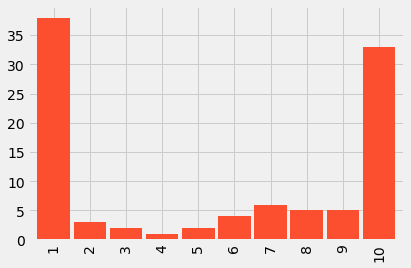

In [66]:
# replicate the figure post
fake = pd.Series(fakelist, index=range(1,11))
fake.plot.bar(color='C1', width=0.9)

In [0]:
fakelist2=[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
     2, 2, 2, 
     3, 3, 3,
     4, 4,
     5, 5, 5,
     6, 6, 6, 6,
     7, 7, 7, 7, 7,
     8, 8, 8, 8,
     9, 9, 9, 9, 
     10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10]

In [0]:
fake2 = pd.Series(fakelist2)

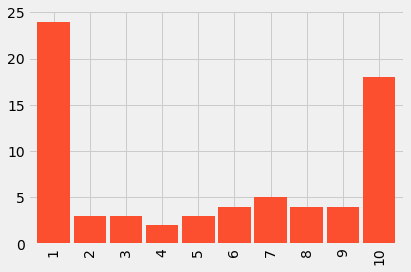

In [69]:
fake2.value_counts().sort_index().plot.bar(color='C1', width=0.9);

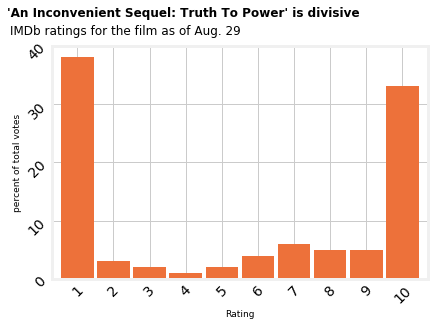

In [70]:
# annotate with text

fig, ax = plt.subplots()
fig.patch.set(facecolor='white')

# Set the bars
fake.plot.bar(width=0.9, color='#ED713A')

ax.set(facecolor="white")

# Set the title and subtitle
ax.set_title("'An Inconvenient Sequel: Truth To Power' is divisive",
             fontsize=12,
             x=.35,
             y=1.1,
             fontweight='bold')
ax.text(s="IMDb ratings for the film as of Aug. 29", fontsize=12, x=-1.85, y=42);

# Set the x and y axes labels
ax.set_xlabel("Rating", fontsize=9)
ax.set_ylabel("percent of total votes", fontsize=9)

# Fix the x and y axis tick marks and grid
ax.set_xticklabels(range(1,11), rotation=45)
ax.set_yticklabels(range(0, 50, 10), rotation=45)
ax.set_yticks(range(0, 50, 10));

In [71]:
display(example)

# Reproduce with real data

Using this dataset relies on us making two discoveries:

1) The dataset shows logs of the data at different timestamps and these timestamps are cumulative, meaning that it has all of the raings as earlier timestamps, but with the new ones added on top.

2) The dataset logs ratings breakdowns for a bunc of different demographic groups per timestamp.

Once we realize these two things, we realize that we only really need 1 line of this dataset to make our graphic, it's the last lie that holds the ratings for all IMDb users for the very last time stamp.

In [0]:
# read the data form 538's github repo
df = pd.read_csv('https://raw.githubusercontent.com/fivethirtyeight/data/master/inconvenient-sequel/ratings.csv')

In [73]:
df.head()

,timestamp,respondents,category,link,average,mean,median,1_votes,2_votes,3_votes,4_votes,5_votes,6_votes,7_votes,8_votes,9_votes,10_votes,1_pct,2_pct,3_pct,4_pct,5_pct,6_pct,7_pct,8_pct,9_pct,10_pct
0,2017-07-17 12:28:32.785639,402,Males,http://www.imdb.com/title/tt6322922/ratings-male,4.6,5.0,2,197,7,7,3,7,7,11,8,20,135,49.0,1.7,1.7,0.7,1.7,1.7,2.7,2.0,5.0,33.6
1,2017-07-17 12:28:33.025600,78,Females,http://www.imdb.com/title/tt6322922/ratings-fe...,6.9,7.7,10,16,1,0,1,1,0,3,4,3,49,20.5,1.3,0.0,1.3,1.3,0.0,3.8,5.1,3.8,62.8
2,2017-07-17 12:28:33.273919,4,Aged under 18,http://www.imdb.com/title/tt6322922/ratings-age_1,4.2,4.2,3,2,0,0,0,1,0,0,0,0,1,50.0,0.0,0.0,0.0,25.0,0.0,0.0,0.0,0.0,25.0
3,2017-07-17 12:28:33.495325,4,Males under 18,http://www.imdb.com/title/tt6322922/ratings-ma...,4.2,4.2,3,2,0,0,0,1,0,0,0,0,1,50.0,0.0,0.0,0.0,25.0,0.0,0.0,0.0,0.0,25.0
4,2017-07-17 12:28:33.722849,130,Aged 18-29,http://www.imdb.com/title/tt6322922/ratings-age_2,6.3,6.5,9,41,0,3,1,2,3,6,4,6,64,31.5,0.0,2.3,0.8,1.5,2.3,4.6,3.1,4.6,49.2


In [0]:
# Convert timestamp strings to actual datetime objects
df['timestamp'] = pd.to_datetime(df['timestamp'])

In [0]:
# Use the timestamp as the unique index identifier
# so that we can select rows by timestamp
df.set_index('timestamp', inplace=True)

In [76]:
df.head()

,respondents,category,link,average,mean,median,1_votes,2_votes,3_votes,4_votes,5_votes,6_votes,7_votes,8_votes,9_votes,10_votes,1_pct,2_pct,3_pct,4_pct,5_pct,6_pct,7_pct,8_pct,9_pct,10_pct
timestamp,,,,,,,,,,,,,,,,,,,,,,,,,,
2017-07-17 12:28:32.785639,402,Males,http://www.imdb.com/title/tt6322922/ratings-male,4.6,5.0,2,197,7,7,3,7,7,11,8,20,135,49.0,1.7,1.7,0.7,1.7,1.7,2.7,2.0,5.0,33.6
2017-07-17 12:28:33.025600,78,Females,http://www.imdb.com/title/tt6322922/ratings-fe...,6.9,7.7,10,16,1,0,1,1,0,3,4,3,49,20.5,1.3,0.0,1.3,1.3,0.0,3.8,5.1,3.8,62.8
2017-07-17 12:28:33.273919,4,Aged under 18,http://www.imdb.com/title/tt6322922/ratings-age_1,4.2,4.2,3,2,0,0,0,1,0,0,0,0,1,50.0,0.0,0.0,0.0,25.0,0.0,0.0,0.0,0.0,25.0
2017-07-17 12:28:33.495325,4,Males under 18,http://www.imdb.com/title/tt6322922/ratings-ma...,4.2,4.2,3,2,0,0,0,1,0,0,0,0,1,50.0,0.0,0.0,0.0,25.0,0.0,0.0,0.0,0.0,25.0
2017-07-17 12:28:33.722849,130,Aged 18-29,http://www.imdb.com/title/tt6322922/ratings-age_2,6.3,6.5,9,41,0,3,1,2,3,6,4,6,64,31.5,0.0,2.3,0.8,1.5,2.3,4.6,3.1,4.6,49.2


In [0]:
# grab only the rows corresponding to the last day
lastday=df['2017-08-29']

In [0]:
# get the demographic breakowns for all IMDb users on the last day
lastday_filtered = lastday[lastday['category'] == 'IMDb users']

In [79]:
lastday_filtered.tail()

,respondents,category,link,average,mean,median,1_votes,2_votes,3_votes,4_votes,5_votes,6_votes,7_votes,8_votes,9_votes,10_votes,1_pct,2_pct,3_pct,4_pct,5_pct,6_pct,7_pct,8_pct,9_pct,10_pct
timestamp,,,,,,,,,,,,,,,,,,,,,,,,,,
2017-08-29 22:30:06.423181,2662,IMDb users,http://www.imdb.com/title/tt6322922/ratings,5.4,5.6,7,1021,69,38,25,55,110,154,147,146,897,38.4,2.6,1.4,0.9,2.1,4.1,5.8,5.5,5.5,33.7
2017-08-29 22:40:06.233659,2662,IMDb users,http://www.imdb.com/title/tt6322922/ratings,5.4,5.6,7,1021,69,38,25,55,110,154,147,146,897,38.4,2.6,1.4,0.9,2.1,4.1,5.8,5.5,5.5,33.7
2017-08-29 22:50:06.592571,2662,IMDb users,http://www.imdb.com/title/tt6322922/ratings,5.4,5.6,7,1021,69,38,25,55,110,154,147,146,897,38.4,2.6,1.4,0.9,2.1,4.1,5.8,5.5,5.5,33.7
2017-08-29 23:00:05.829558,2662,IMDb users,http://www.imdb.com/title/tt6322922/ratings,5.4,5.6,7,1021,69,38,25,55,110,154,147,146,897,38.4,2.6,1.4,0.9,2.1,4.1,5.8,5.5,5.5,33.7
2017-08-29 23:10:06.218251,2662,IMDb users,http://www.imdb.com/title/tt6322922/ratings,5.4,5.6,7,1021,69,38,25,55,110,154,147,146,897,38.4,2.6,1.4,0.9,2.1,4.1,5.8,5.5,5.5,33.7


In [80]:
# just grab the very last line (latest timestamp) of IMDb user ratings
# this should be the most up to date data from the dataset
final = lastday_filtered.tail(1)
final.T

timestamp,2017-08-29 23:10:06.218251
respondents,2662
category,IMDb users
link,http://www.imdb.com/title/tt6322922/ratings
average,5.4
mean,5.6
median,7
1_votes,1021
2_votes,69
3_votes,38
4_votes,25


In [81]:
# Grab only the percentage columns since we don't care about the raw
# counts in making our graph
pct_columns = ['1_pct', '2_pct', '3_pct', '4_pct', '5_pct',
               '6_pct', '7_pct', '8_pct', '9_pct', '10_pct']
final[pct_columns].T

timestamp,2017-08-29 23:10:06.218251
1_pct,38.4
2_pct,2.6
3_pct,1.4
4_pct,0.9
5_pct,2.1
6_pct,4.1
7_pct,5.8
8_pct,5.5
9_pct,5.5
10_pct,33.7


In [82]:
# Reset the index so that it's numeric again
# and rename the percent column for easy access in our plotting
plot_data = final[pct_columns].T
plot_data.index=range(1,11)
plot_data.columns = ['percent']
plot_data

,percent
1,38.4
2,2.6
3,1.4
4,0.9
5,2.1
6,4.1
7,5.8
8,5.5
9,5.5
10,33.7


In [83]:
display(example)

# Generate the figure

[]

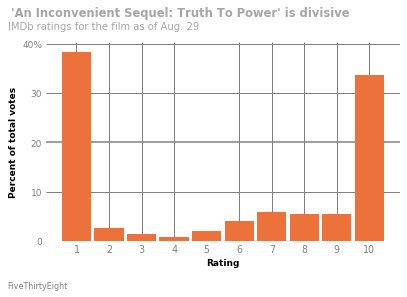

In [84]:
fig, ax = plt.subplots()

# Figure background color
#fig.patch.set(facecolor="white", alpha=0)
fig.patch.set(visible=False)

fig.set_figwidth(5.35)
fig.set_figheight(3.25)
# Set the bars
ax.bar(x=range(1,11), height=plot_data['percent'], width=0.9, color="#ED713A")

ax.set_position([0, 0, .92, .85])
# Axes background color
ax.set(facecolor="white")
ax.patch.set(alpha=0)

# Gridline colors
for xline in ax.get_xgridlines():
    xline.set_color('grey')

for yline in ax.get_ygridlines():
    yline.set_color('grey')

# Gridline width
ax.get_ygridlines()[2].set_lw(1.5)

ax.get_xgridlines()[4].set_lw(0.60)
ax.get_xgridlines()[4].set_color('white')


# Set the title and subtitle
ax.set_title("'An Inconvenient Sequel: Truth To Power' is divisive",
             fontsize = 11.5,
             x = .38,
             y = 1.1,
             fontweight = 'bold',
             alpha=0.35)
ax.text(s="IMDb ratings for the film as of Aug. 29", fontsize=10, x=-1.1, y=43,
                                                    alpha=0.35)

# Set the x and y axes labels
ax.set_xlabel('Rating', fontsize = 9, fontweight = 'bold')
ax.set_ylabel("Percent of total votes", fontsize=9, fontweight = 'bold')

# Fix the x and y axes' tick marks and grid
ax.set_xticklabels(range(1,11), rotation = 0, fontsize=9.5, color='grey')
ax.set_xticks(range(1, 11))
ax.set_yticklabels(range(0, 50, 10), fontsize=9, color='grey')
ax.set_yticks(range(0, 50, 10));

ylist = ax.get_yticklabels()
ylist[-1].set_text('40%')
ax.set_yticklabels(ylist)


for spine in ax.spines.values():
    spine.set_visible(False)

fig.text(-.1, -.2, 'FiveThirtyEight', fontsize=8, color='grey')

plt.plot()

In [85]:
display(example)

In [0]:
plt.close('all')

#2) Reproduce another example from FiveThityEight's shared data repository.

**FiveThirtyEight's Graph:**

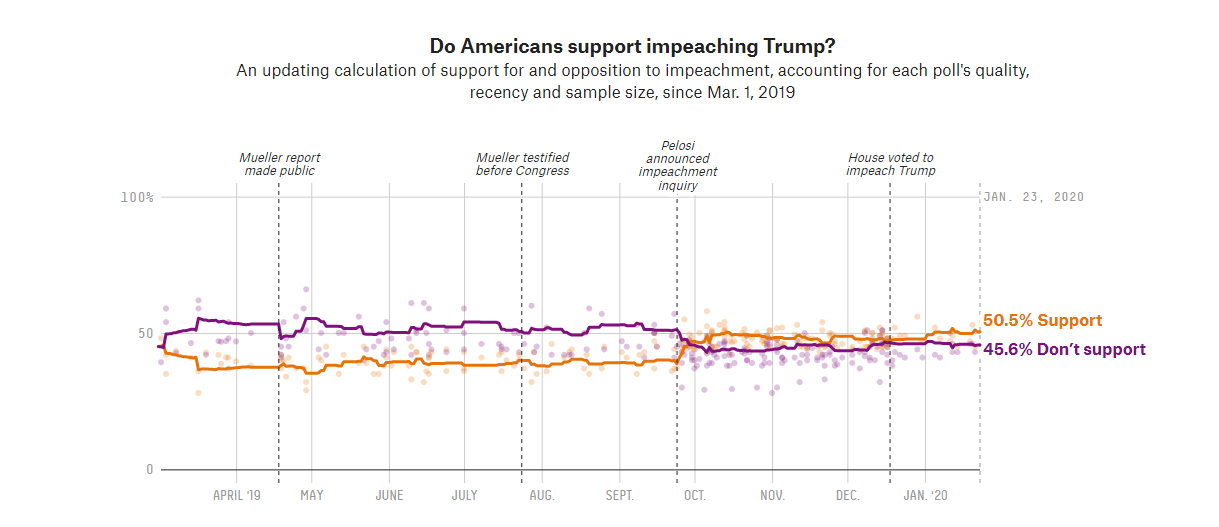

In [295]:
from PIL import Image
example2 = Image.open('/content/trump_impeachment_graph.PNG')
display(example2)

In [376]:
# Import seaborn and load the data
import seaborn as sns; sns.set()
data_source = '/content/impeachment_topline_2020-01-23-0819PM-MST.csv'

trump_df = pd.read_csv(data_source)
print(trump_df.shape)
trump_df.head()

(7388, 8)


,president,subgroup,party,category_group,modeldate,yes_estimate,no_estimate,timestamp
0,Donald Trump,All polls,rep,remove,1/23/2020,9.992340,84.867528,21:40:39 23 Jan 2020
1,Donald Trump,All polls,rep,impeach,1/23/2020,10.892624,86.685518,21:40:38 23 Jan 2020
2,Donald Trump,All polls,rep,begin,1/23/2020,14.471712,82.718082,21:40:35 23 Jan 2020
3,Donald Trump,All polls,rep,all,1/23/2020,10.794039,86.870986,21:40:34 23 Jan 2020
4,Donald Trump,All polls,ind,remove,1/23/2020,42.310286,44.061910,21:40:30 23 Jan 2020


In [377]:
# Let's try going for all polls in the impeachment category
trump_df = trump_df[(trump_df['subgroup'] == 'All polls') & (trump_df['category_group'] == 'impeach')]
trump_yn = trump_df[['yes_estimate', 'no_estimate', 'timestamp']]
print(trump_yn.shape)
trump_yn.head()

(2164, 3)


,yes_estimate,no_estimate,timestamp
1,10.892624,86.685518,21:40:38 23 Jan 2020
5,47.119166,44.620055,21:40:29 23 Jan 2020
9,87.078535,9.585632,21:40:21 23 Jan 2020
13,50.425065,45.564876,21:40:13 23 Jan 2020
17,10.892624,86.685518,14:50:39 22 Jan 2020


In [378]:
# convert the timestamp column to actual datetime objects
trump_yn['timestamp'] = pd.to_datetime(trump_yn['timestamp'])
trump_yn.dtypes

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


yes_estimate           float64
no_estimate            float64
timestamp       datetime64[ns]
dtype: object

In [379]:
# Timestamps are much prettier in the left-most column I think
trump_yn = trump_yn.reindex(['timestamp', 'yes_estimate', 'no_estimate'], axis=1)
trump_yn.head()

,timestamp,yes_estimate,no_estimate
1,2020-01-23 21:40:38,10.892624,86.685518
5,2020-01-23 21:40:29,47.119166,44.620055
9,2020-01-23 21:40:21,87.078535,9.585632
13,2020-01-23 21:40:13,50.425065,45.564876
17,2020-01-22 14:50:39,10.892624,86.685518


In [380]:
# Melt the data into tidy format
trump_yn = trump_yn.melt(id_vars='timestamp')
trump_yn.head()

,timestamp,variable,value
0,2020-01-23 21:40:38,yes_estimate,10.892624
1,2020-01-23 21:40:29,yes_estimate,47.119166
2,2020-01-23 21:40:21,yes_estimate,87.078535
3,2020-01-23 21:40:13,yes_estimate,50.425065
4,2020-01-22 14:50:39,yes_estimate,10.892624


In [381]:
# Strip and capitalize the 'variable' column's strings
trump_yn['variable'] = trump_yn['variable'].apply(lambda x: str(x).strip('_estimate').upper())
trump_yn.head()

,timestamp,variable,value
0,2020-01-23 21:40:38,Y,10.892624
1,2020-01-23 21:40:29,Y,47.119166
2,2020-01-23 21:40:21,Y,87.078535
3,2020-01-23 21:40:13,Y,50.425065
4,2020-01-22 14:50:39,Y,10.892624


In [382]:
trump_yn['variable'].value_counts()

Y     2164
NO    2164
Name: variable, dtype: int64

In [383]:
# Get rid of that trailing 'O'
trump_yn['variable'] = trump_yn['variable'].apply(lambda x : str(x).strip('O'))
trump_yn['variable'].value_counts()

Y    2164
N    2164
Name: variable, dtype: int64

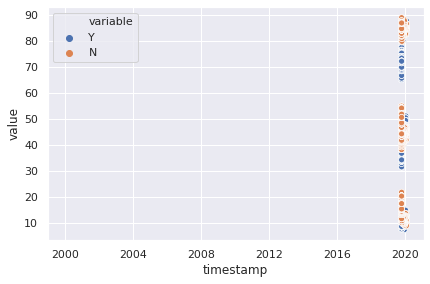

In [384]:
# Quick visual check of the data
sns.scatterplot(x='timestamp', y='value', hue='variable', data=trump_yn)

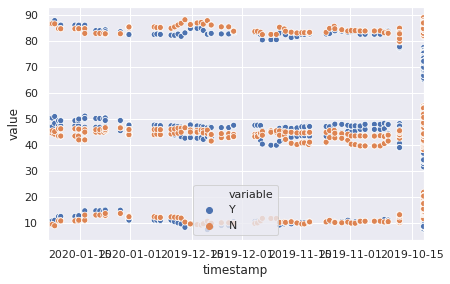

In [385]:
# Apparently matplotlib does wonky stuff with datetimes in scatter plots,
# but there's a workaround. (ty google)
ax = sns.scatterplot(x='timestamp', y='value', hue='variable', data=trump_yn)
ax.set(xlim = (str(trump_yn['timestamp'].iloc[0]), trump_yn['timestamp'].iloc[-1]))
plt.show()

In [386]:
# might help if the timestamps are in chronological order
trump_yn = trump_yn.iloc[::-1]
trump_yn = trump_yn.reset_index(drop=True)
trump_yn.head()

,timestamp,variable,value
0,2019-10-11 18:03:26,N,86.99356
1,2019-10-11 16:38:46,N,50.72449
2,2019-10-11 17:34:36,N,51.95618
3,2019-10-11 17:07:58,N,17.57994
4,2019-10-11 18:03:25,N,86.99356


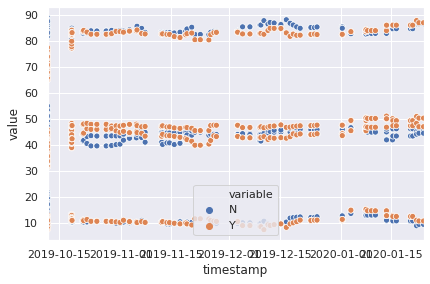

In [387]:
ax = sns.scatterplot(x='timestamp', y='value', hue='variable', data=trump_yn)
ax.set(xlim = (str(trump_yn['timestamp'].iloc[0]), trump_yn['timestamp'].iloc[-1]))
plt.show()

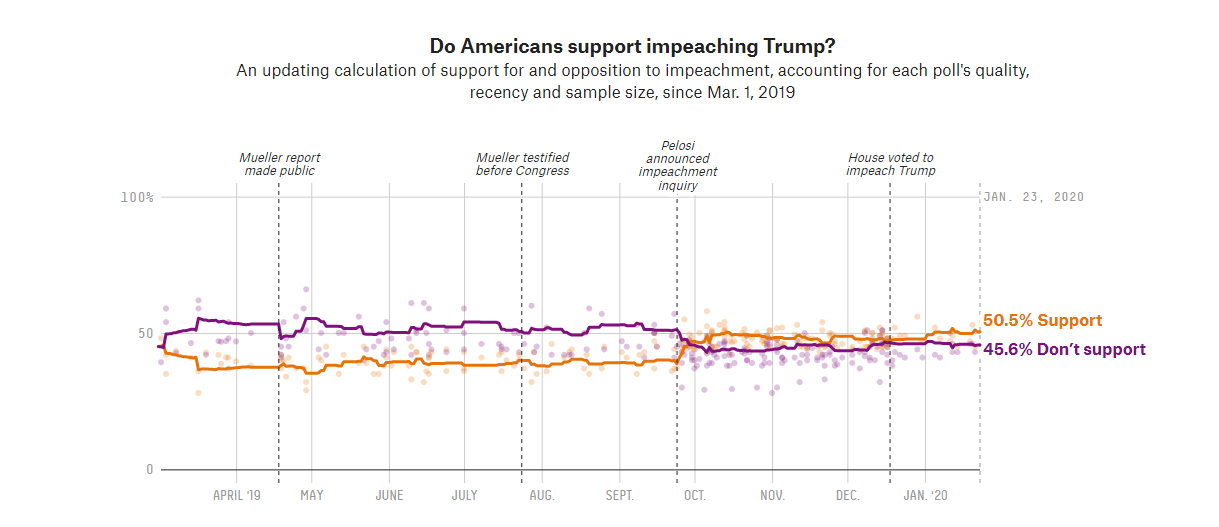

In [388]:
display(example2)

In [389]:
# cut the dates into something a little more readable
month_labels =["APRIL '19", "MAY", "JUNE", "JULY", "AUG,",
               "SEPT.", "OCT.", "NOV.", "DEC.", "JAN. '20"]

trump_yn['timestamp'] = pd.cut(trump_yn['timestamp'], 10, labels=month_labels)

trump_yn.head()

,timestamp,variable,value
0,APRIL '19,N,86.99356
1,APRIL '19,N,50.72449
2,APRIL '19,N,51.95618
3,APRIL '19,N,17.57994
4,APRIL '19,N,86.99356


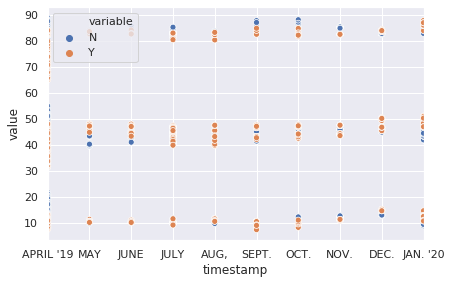

In [390]:
ax = sns.scatterplot(x='timestamp', y='value', hue='variable', data=trump_yn)
ax.set(xlim = (str(trump_yn['timestamp'].iloc[0]), trump_yn['timestamp'].iloc[-1]))
plt.show()

In [0]:
# The x-axis ticks look a lot better, but the datapoints were trimmed too much.

In [391]:
#TODO:
'''
-reset and rebin the timestamps to something between this and the original,

-set the xticks and labels on the graph instead of the data

-add line plots over the scatter which display the mean results for each variable

-tinker with color and alpha etc to approach the example graph
'''

'\n-reset and rebin the timestamps to something between this and the original,\n\n-set the xticks and labels on the graph instead of the data\n\n-add line plots over the scatter which display the mean results for each variable\n'

# STRETCH OPTIONS

### 1) Reproduce one of the following using the matplotlib or seaborn libraries:

- [thanksgiving-2015](https://fivethirtyeight.com/features/heres-what-your-part-of-america-eats-on-thanksgiving/) 
- [candy-power-ranking](https://fivethirtyeight.com/features/the-ultimate-halloween-candy-power-ranking/) 
- or another example of your choice!

### 2) Make more charts!

Choose a chart you want to make, from [Visual Vocabulary - Vega Edition](http://ft.com/vocabulary).

Find the chart in an example gallery of a Python data visualization library:
- [Seaborn](http://seaborn.pydata.org/examples/index.html)
- [Altair](https://altair-viz.github.io/gallery/index.html)
- [Matplotlib](https://matplotlib.org/gallery.html)
- [Pandas](https://pandas.pydata.org/pandas-docs/stable/visualization.html)

Reproduce the chart. [Optionally, try the "Ben Franklin Method."](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit) If you want, experiment and make changes.

Take notes. Consider sharing your work with your cohort!

In [0]:
# More Work Here